In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table
from scipy.stats import ttest_ind
from scipy import stats
import statsmodels.api as sm

pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [2]:
dataset_original =  pd.read_csv("../datos/competencia_03.csv.gz")

In [3]:
#dataset = dataset_original.copy()
dataset_baseline = dataset_original[((dataset_original['foto_mes'] >= 201903) & (dataset_original['foto_mes'] <= 201910)) | (dataset_original['foto_mes'] == 202107)]
dataset = dataset_baseline.copy()

In [4]:
dataset['foto_mes'].unique()

array([201906, 201907, 201909, 201910, 201903, 201905, 201908, 201904,
       202107], dtype=int64)

In [5]:
dataset.set_index('foto_mes', inplace=True)

In [6]:
df_roto_cero_null = ((dataset.isnull() | (dataset == 0)).groupby('foto_mes').mean() * 100).round(2)
df_roto_cero_null = df_roto_cero_null[df_roto_cero_null.columns[df_roto_cero_null.eq(100).any()]].stack().reset_index()
df_roto_cero_null.columns = ['foto_mes', 'columna', 'porcentagem']
df_roto_cero_null = df_roto_cero_null[df_roto_cero_null['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [7]:
df_roto_cero_bruto = ((dataset == 0).groupby('foto_mes').mean() * 100).round(2)
df_roto_cero = df_roto_cero_bruto[df_roto_cero_bruto.columns[df_roto_cero_bruto.eq(100).any()]].stack().reset_index()
df_roto_cero.columns = ['foto_mes', 'columna', 'porcentagem']
df_roto_cero = df_roto_cero[df_roto_cero['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [8]:
df_roto_null = ((dataset.isnull()).groupby('foto_mes').mean() * 100).round(2)
df_roto_null = df_roto_null[df_roto_null.columns[df_roto_null.eq(100).any()]].stack().reset_index()
df_roto_null.columns = ['foto_mes', 'columna', 'porcentagem']
df_roto_null = df_roto_null[df_roto_null['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

C:\Users\maico\AppData\Local\Temp\ipykernel_39540\288578543.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foto_mes', y='quantidade_columnas', data=count_df_roto_cero_null, palette='viridis')


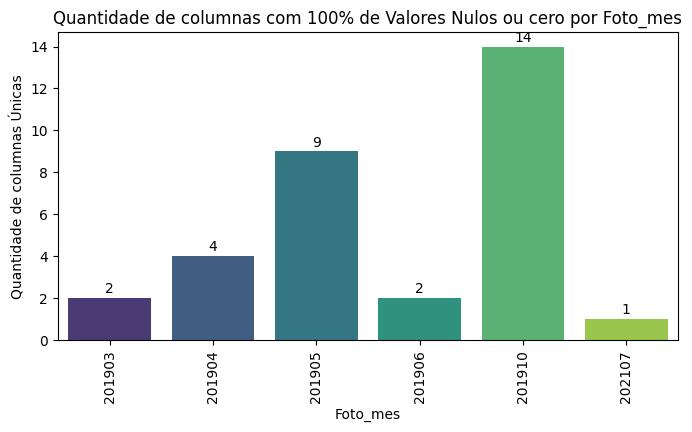

In [9]:
count_df_roto_cero_null = df_roto_cero_null.groupby('foto_mes')['columna'].nunique().reset_index(name='quantidade_columnas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_columnas', data=count_df_roto_cero_null, palette='viridis')
plt.title('Quantidade de columnas com 100% de Valores Nulos ou cero por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de columnas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_cero_null['quantidade_columnas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

C:\Users\maico\AppData\Local\Temp\ipykernel_39540\979044820.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foto_mes', y='quantidade_columnas', data=count_df_roto_cero, palette='viridis')


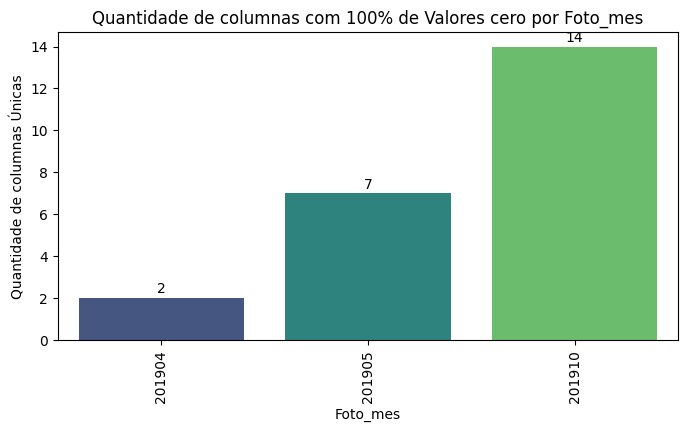

In [10]:
count_df_roto_cero = df_roto_cero.groupby('foto_mes')['columna'].nunique().reset_index(name='quantidade_columnas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_columnas', data=count_df_roto_cero, palette='viridis')
plt.title('Quantidade de columnas com 100% de Valores cero por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de columnas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_cero['quantidade_columnas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

C:\Users\maico\AppData\Local\Temp\ipykernel_39540\1480680052.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foto_mes', y='quantidade_columnas', data=count_df_roto_null, palette='viridis')


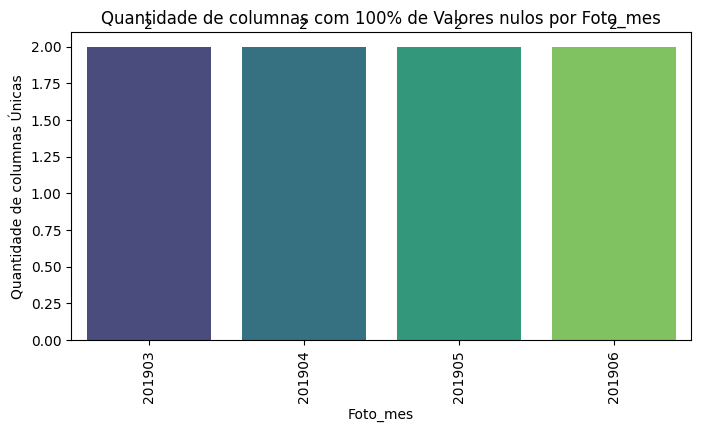

In [11]:
count_df_roto_null = df_roto_null.groupby('foto_mes')['columna'].nunique().reset_index(name='quantidade_columnas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_columnas', data=count_df_roto_null, palette='viridis')
plt.title('Quantidade de columnas com 100% de Valores nulos por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de columnas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_null['quantidade_columnas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [12]:
#Exclui os valores de cmobile_app_trx e tmobile_app para os anos de 201901 ate 201906 porque todos os valores estao null, talvez nao tinha essa funcionalidade na epoca no sistema

merged_df = pd.merge(count_df_roto_cero_null, count_df_roto_null, on='foto_mes', how='outer', suffixes=('_cero', '_null'))
merged_df = merged_df.fillna(0)
merged_df['quantidade_columnas'] =  merged_df['quantidade_columnas_cero'] - merged_df['quantidade_columnas_null']

C:\Users\maico\AppData\Local\Temp\ipykernel_39540\494774549.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foto_mes', y='quantidade_columnas', data=merged_df, palette='viridis')


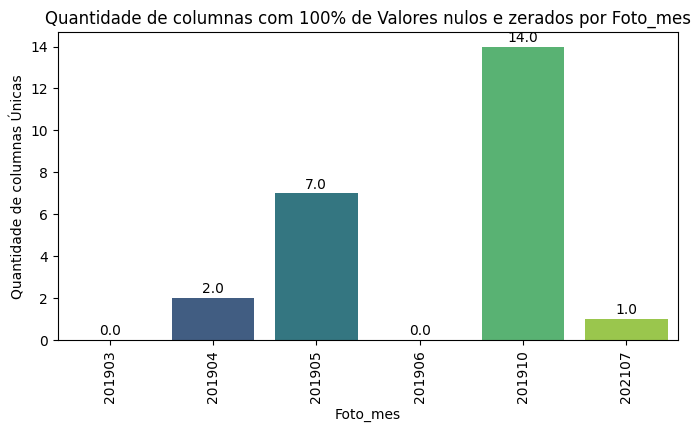

In [13]:

plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_columnas', data=merged_df, palette='viridis')
plt.title('Quantidade de columnas com 100% de Valores nulos e zerados por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de columnas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(merged_df['quantidade_columnas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [14]:
columnas_imputar = df_roto_cero['columna'].unique()

In [15]:
dataset[columnas_imputar] = dataset[columnas_imputar].replace(0, np.nan)

In [16]:
dataset[columnas_imputar].isna().sum()   

ctarjeta_visa_debitos_automaticos      490081
mttarjeta_visa_debitos_automaticos     490081
mrentabilidad                          266552
mrentabilidad_annual                   266254
mcomisiones                            290468
mactivos_margen                        303461
mpasivos_margen                        275296
ccomisiones_otras                      290449
mcomisiones_otras                      290469
mtarjeta_master_descuentos            1185521
ctarjeta_master_descuentos            1175076
mtarjeta_visa_descuentos              1148310
ctarjeta_visa_descuentos              1118545
mcajeros_propios_descuentos           1169330
ccajeros_propios_descuentos           1162260
chomebanking_transacciones             558607
dtype: int64

In [17]:
dataset_sin_imputar = dataset.copy().reset_index()
dataset_imputar = dataset_baseline.copy()

In [18]:
dataset_sin_imputar[columnas_imputar].isna().sum()

ctarjeta_visa_debitos_automaticos      490081
mttarjeta_visa_debitos_automaticos     490081
mrentabilidad                          266552
mrentabilidad_annual                   266254
mcomisiones                            290468
mactivos_margen                        303461
mpasivos_margen                        275296
ccomisiones_otras                      290449
mcomisiones_otras                      290469
mtarjeta_master_descuentos            1185521
ctarjeta_master_descuentos            1175076
mtarjeta_visa_descuentos              1148310
ctarjeta_visa_descuentos              1118545
mcajeros_propios_descuentos           1169330
ccajeros_propios_descuentos           1162260
chomebanking_transacciones             558607
dtype: int64

In [19]:
dataset_imputar[columnas_imputar].isna().sum()

ctarjeta_visa_debitos_automaticos         0
mttarjeta_visa_debitos_automaticos        0
mrentabilidad                             0
mrentabilidad_annual                      0
mcomisiones                               0
mactivos_margen                           0
mpasivos_margen                           0
ccomisiones_otras                         0
mcomisiones_otras                         0
mtarjeta_master_descuentos             7864
ctarjeta_master_descuentos                0
mtarjeta_visa_descuentos              24753
ctarjeta_visa_descuentos                  0
mcajeros_propios_descuentos               0
ccajeros_propios_descuentos               0
chomebanking_transacciones                0
dtype: int64

In [20]:
dataset_imputar[columnas_imputar] = dataset_imputar[columnas_imputar].replace(0, np.nan)

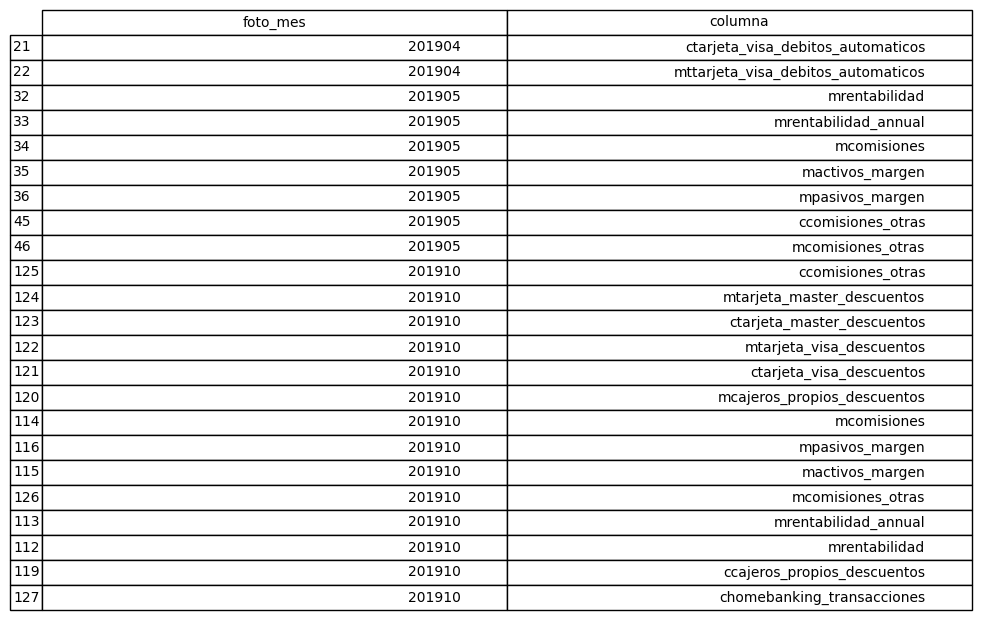

In [21]:
df_selecionado = df_roto_cero.drop(columns='porcentagem')
df_selecionado = df_selecionado.rename(columns={'columna': 'columna'})

fig, ax = plt.subplots(figsize=(8, 6))

ax.axis('off')
tabla = table(ax, df_selecionado, loc='center')

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.5, 1.5)  # Ajusta a escala da tabela

plt.savefig('tabela_exportada.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

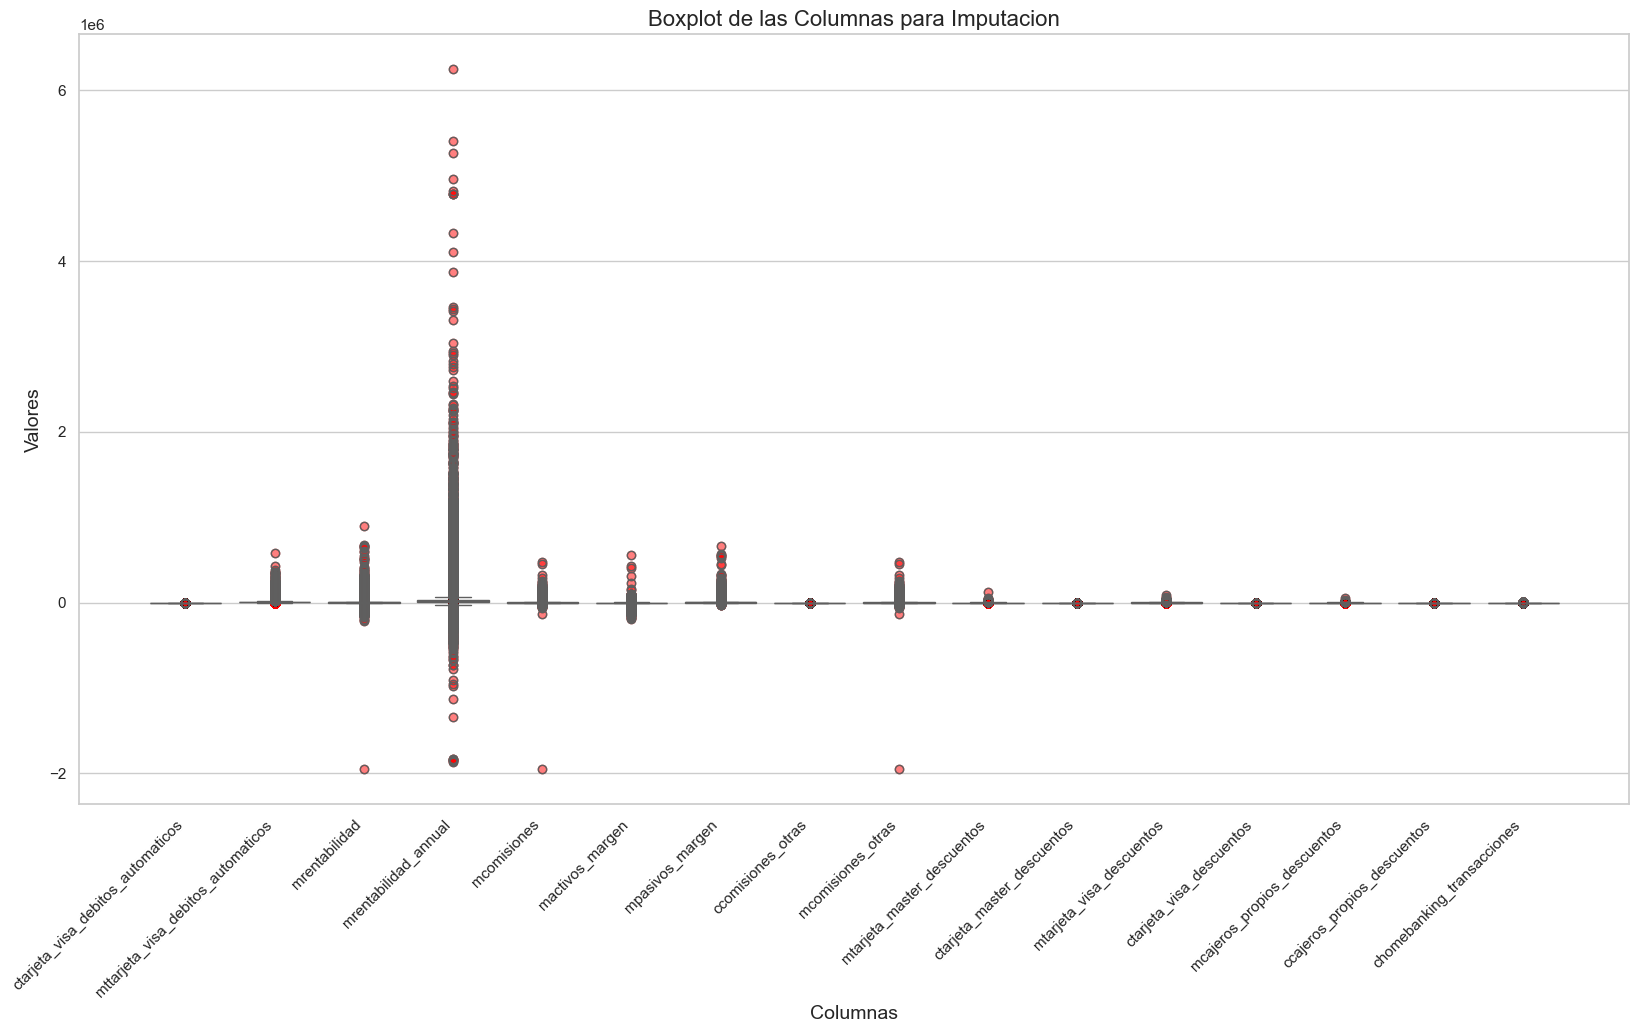

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=dataset_imputar[columnas_imputar], palette="Set3")

for i in range(len(columnas_imputar)):
    y = dataset_imputar[columnas_imputar[i]]
    x = [i] * len(y)
    ax.scatter(x, y, alpha=0.5, color='red')

plt.title("Boxplot de las Columnas para Imputacion", fontsize=16)
plt.xlabel("Columnas", fontsize=14)
plt.ylabel("Valores", fontsize=14)

plt.xticks(range(len(columnas_imputar)), columnas_imputar, rotation=45, ha='right')

plt.show()

In [23]:
#dataset_imputar[columnas_imputar].mean()
dataset_inputado_media_cliente = dataset_imputar.copy()
dataset_inputado_mediana_cliente = dataset_imputar.copy()

dataset_inputado_media_cliente[columnas_imputar] = dataset_imputar.groupby('numero_de_cliente')[columnas_imputar].transform(lambda x: x.fillna(x.mean()))
dataset_inputado_mediana_cliente[columnas_imputar] = dataset_imputar.groupby('numero_de_cliente')[columnas_imputar].transform(lambda x: x.fillna(x.median()))
dataset_imputar.sort_values(by=['numero_de_cliente', 'foto_mes'], inplace=True)

#dataset_inputado_media_cliente[columnas_imputar] = dataset_imputar.groupby('numero_de_cliente')[columnas_imputar].transform(lambda x: x.fillna(x.tail(3).mean()))
#dataset_inputado_mediana_cliente[columnas_imputar] = dataset_imputar.groupby('numero_de_cliente')[columnas_imputar].transform(lambda x: x.fillna(x.tail(3).median()))


C:\Users\maico\AppData\Roaming\Python\Python311\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\maico\AppData\Roaming\Python\Python311\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [24]:
dataset_inputado_media_cliente[columnas_imputar] = dataset_inputado_media_cliente[columnas_imputar].fillna(0)
dataset_inputado_mediana_cliente[columnas_imputar] = dataset_inputado_mediana_cliente[columnas_imputar].fillna(0)

In [25]:
dataset_baseline[columnas_imputar].describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1201225.000,1209089.000,1184336.000,1209089.000,1209089.000,1209089.000,1209089.000
mean,2.265,4424.435,2470.235,24413.550,883.648,-403.443,1755.959,7.324,889.005,16.252,0.042,48.393,0.118,16.237,0.078,13.659
std,3.175,9354.408,6943.785,54762.758,2947.284,2427.607,4751.724,7.507,2969.637,274.646,0.308,443.006,0.536,159.521,0.563,41.399
min,0.000,0.000,-1948808.830,-1862286.080,-1953482.100,-189705.070,-28681.220,0.000,-1953482.100,0.000,0.000,0.000,0.000,-51.840,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,-658.110,8.100,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,675.640,1144.410,13064.970,377.910,-27.710,621.230,8.000,378.630,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,3.000,4981.300,2775.180,27837.740,1171.830,0.000,1759.860,10.000,1172.830,0.000,0.000,0.000,0.000,0.000,0.000,8.000
max,57.000,577457.570,894482.140,6246624.680,471058.130,562428.340,667148.640,263.000,479099.150,124292.830,21.000,85508.390,27.000,53538.070,41.000,4257.000


In [26]:
dataset_sin_imputar[columnas_imputar].fillna(0).describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000
mean,2.265,4424.435,2470.235,24413.550,883.648,-403.443,1755.959,7.324,889.005,16.146,0.042,47.402,0.118,16.237,0.078,13.659
std,3.175,9354.408,6943.785,54762.758,2947.284,2427.607,4751.724,7.507,2969.637,273.754,0.308,438.501,0.536,159.521,0.563,41.399
min,0.000,0.000,-1948808.830,-1862286.080,-1953482.100,-189705.070,-28681.220,0.000,-1953482.100,0.000,0.000,0.000,0.000,-51.840,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,-658.110,8.100,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,675.640,1144.410,13064.970,377.910,-27.710,621.230,8.000,378.630,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,3.000,4981.300,2775.180,27837.740,1171.830,0.000,1759.860,10.000,1172.830,0.000,0.000,0.000,0.000,0.000,0.000,8.000
max,57.000,577457.570,894482.140,6246624.680,471058.130,562428.340,667148.640,263.000,479099.150,124292.830,21.000,85508.390,27.000,53538.070,41.000,4257.000


In [27]:
dataset_inputado_media_cliente[columnas_imputar].describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000
mean,2.729,5362.528,3173.832,31394.067,1143.465,-519.801,2255.298,9.456,1150.370,85.094,0.190,208.490,0.425,49.284,0.229,22.201
std,3.187,9847.651,7412.334,59148.600,3041.366,2565.847,5128.186,7.098,3067.750,608.145,0.567,876.976,0.775,301.767,0.736,45.965
min,0.000,0.000,-1948808.830,-1862286.080,-1953482.100,-189705.070,-28681.220,0.000,-1953482.100,0.000,0.000,0.000,0.000,-51.840,0.000,0.000
25%,1.000,56.300,779.290,9626.682,260.813,-934.330,411.490,6.000,261.190,0.000,0.000,0.000,0.000,0.000,0.000,2.000
50%,2.000,2035.750,1733.430,18346.210,733.780,-272.890,1033.870,8.000,735.820,0.000,0.000,0.000,0.000,0.000,0.000,7.000
75%,4.000,6298.350,3459.690,34127.530,1426.690,17.640,2288.340,12.000,1430.070,0.000,0.000,0.000,1.000,0.000,0.000,22.000
max,57.000,577457.570,894482.140,6246624.680,471058.130,562428.340,667148.640,263.000,479099.150,124292.830,21.000,85508.390,27.000,53538.070,41.000,4257.000


In [28]:
dataset_inputado_mediana_cliente[columnas_imputar].describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000
mean,2.720,5297.845,3138.423,31565.298,1088.928,-490.486,2218.068,9.440,1095.809,83.464,0.187,202.335,0.417,48.436,0.226,20.604
std,3.188,9794.236,7373.466,59579.334,2973.733,2531.359,5140.081,7.107,2999.604,604.587,0.562,863.093,0.766,300.196,0.731,45.619
min,0.000,0.000,-1948808.830,-1862286.080,-1953482.100,-189705.070,-28681.220,0.000,-1953482.100,0.000,0.000,0.000,0.000,-51.840,0.000,0.000
25%,1.000,52.780,774.800,9702.730,233.570,-878.700,393.220,6.000,233.950,0.000,0.000,0.000,0.000,0.000,0.000,2.000
50%,2.000,1970.060,1711.540,18397.240,679.890,-245.340,999.480,8.000,681.780,0.000,0.000,0.000,0.000,0.000,0.000,6.000
75%,4.000,6202.820,3405.620,34179.890,1368.310,17.690,2229.580,12.000,1371.710,0.000,0.000,0.000,1.000,0.000,0.000,17.000
max,57.000,577457.570,894482.140,6246624.680,471058.130,562428.340,667148.640,263.000,479099.150,124292.830,21.000,85508.390,27.000,53538.070,41.000,4257.000


In [29]:
#tabla_resumen_cliente
tabla_resumen_cliente = pd.DataFrame()
tabla_resumen_cliente = pd.DataFrame(dataset_sin_imputar[columnas_imputar].mean().round(4))
tabla_resumen_cliente = tabla_resumen_cliente.rename(columns={0: 'Media_Original'})
tabla_resumen_cliente['Media_pos_imputar_media'] = dataset_inputado_media_cliente[columnas_imputar].mean().round(4)
tabla_resumen_cliente['Media_pos_imputar_mediana'] = dataset_inputado_mediana_cliente[columnas_imputar].mean().round(4)
tabla_resumen_cliente['Mediana_original'] = dataset_sin_imputar[columnas_imputar].median().round(4)
tabla_resumen_cliente['Mediana_pos_imputar_media'] = dataset_inputado_media_cliente[columnas_imputar].median().round(4)
tabla_resumen_cliente['Mediana_pos_imputar_mediana'] = dataset_inputado_mediana_cliente[columnas_imputar].median().round(4)
tabla_resumen_cliente['Std_original'] = dataset_sin_imputar[columnas_imputar].std().round(4)
tabla_resumen_cliente['Std_pos_imputar_media'] = dataset_inputado_media_cliente[columnas_imputar].std().round(4)
tabla_resumen_cliente['Std_pos_imputar_mediana'] = dataset_inputado_mediana_cliente[columnas_imputar].std().round(4)

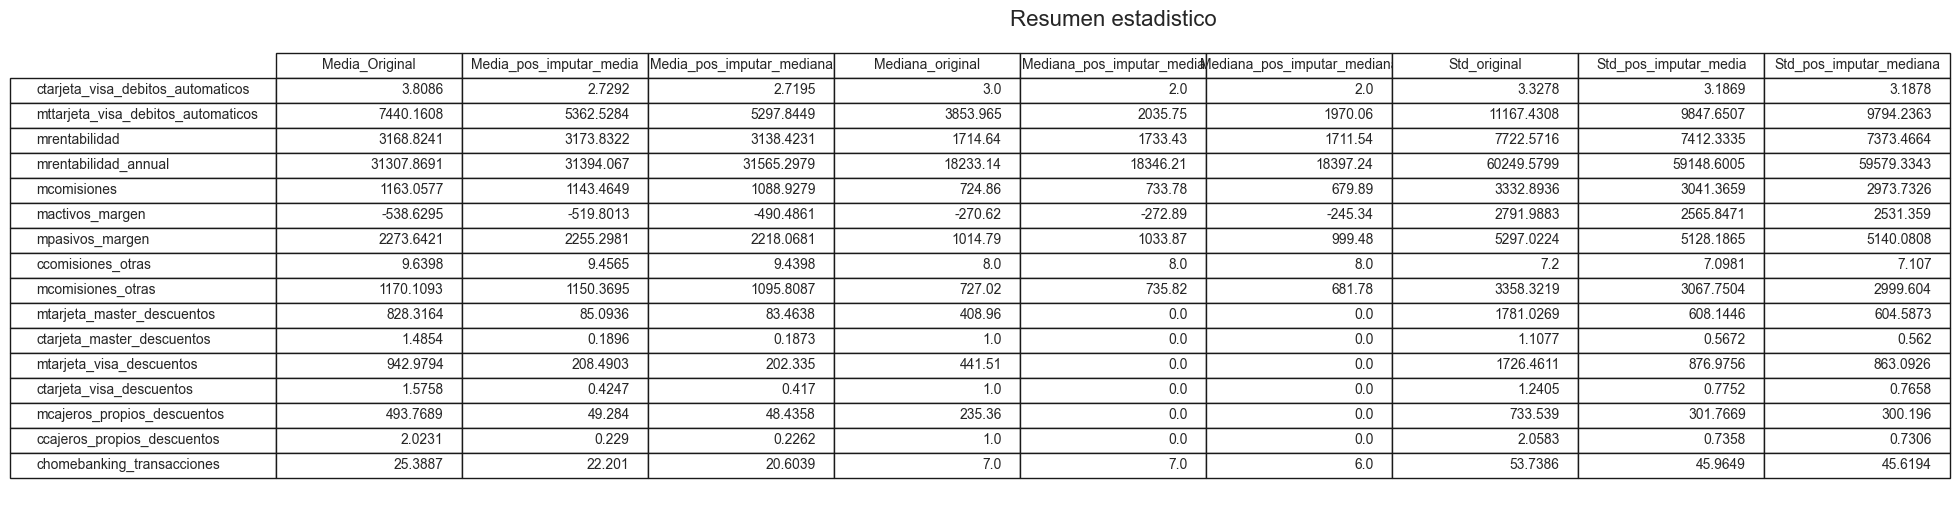

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.axis('off')
tabla = table(ax, tabla_resumen_cliente, loc='center', colWidths=[0.2] * len(tabla_resumen_cliente.columns))

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.5, 1.5)  
plt.title("Resumen estadistico", fontsize=16)

plt.savefig('Resumen estadistico.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [31]:
df_roto_pos_input_media = dataset_inputado_mediana_cliente.copy()
df_roto_pos_input_media.set_index('foto_mes', inplace=True)
df_roto_pos_input_media = ((df_roto_pos_input_media == 0).groupby('foto_mes').mean() * 100).round(2)
df_roto_pos_input_media = df_roto_pos_input_media.stack().reset_index()
df_roto_pos_input_media.columns = ['foto_mes', 'columna', 'porcentagem_cero_antes']
df_roto_pos_input_media = pd.merge(df_roto_cero, df_roto_pos_input_media, on=['foto_mes', 'columna'], how='left')
df_roto_pos_input_media.columns = ['foto_mes', 'columna', 'porcentagem_cero_antes', 'porcentagem_cero_ahora']


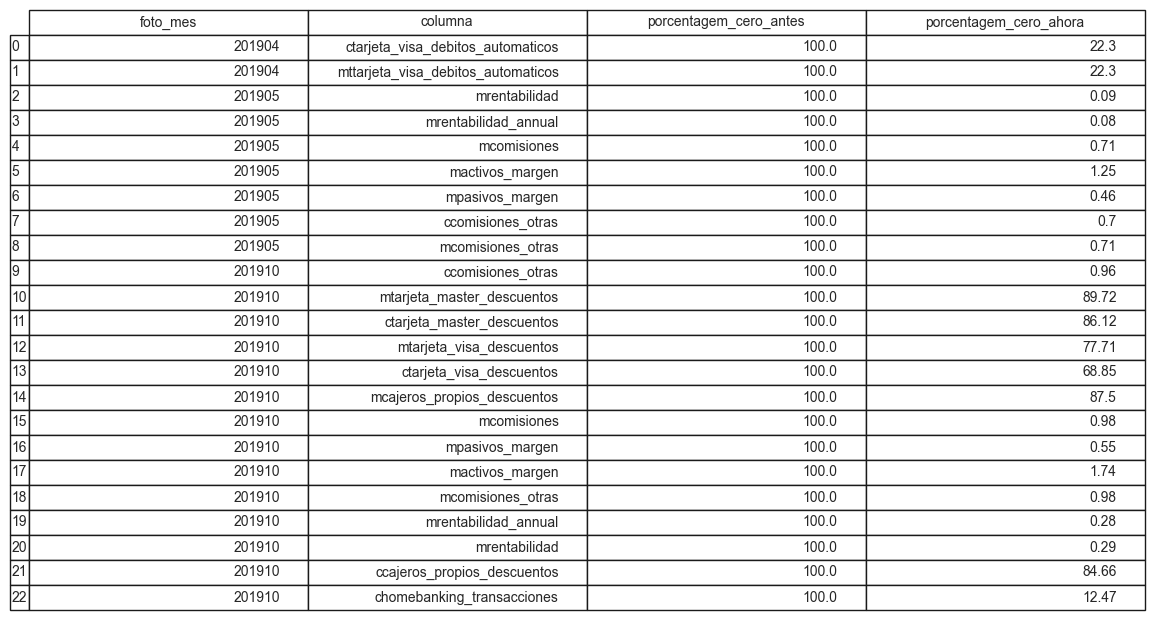

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.axis('off')
tabla = table(ax, df_roto_pos_input_media, loc='center', colWidths=[0.3] * len(df_roto_pos_input_media.columns))

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.5, 1.5)  

plt.savefig('Resumen estadistico.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [33]:
#dataset_baseline.to_csv('../datos/dataset_sem_imputar_roto.csv.gz', index=False) #mantem os rotos

In [34]:
#dataset_sin_imputar.to_csv('../datos/dataset_sem_imputar_por_cliente.csv.gz', index=False) #zero por nan, lightbm resolve

In [35]:
dataset_inputado_media_cliente.to_csv('./datos/dataset_inputado_media_total_por_cliente.csv.gz', index=False)

In [36]:
dataset_inputado_mediana_cliente.to_csv('./datos/dataset_inputado_mediana_total_por_cliente.csv.gz', index=False)